# Week-2 Homework 
This notebook has been created during week-2 of the ML Zoomcamp for assisitng in completing the homework. In here, were are going to create a `linear regression model` for predicting housing prices ie., *median_house_value*

## Import modules

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

## Dataset

In [4]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv -O ../data/02_data_homework.csv

--2022-10-10 02:53:23--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘../data/02_data_homework.csv’

../data/02_data_hom 100%[===================>]   1.36M  --.-KB/s    in 0.08s   

2022-10-10 02:53:23 (16.0 MB/s) - ‘../data/02_data_homework.csv’ saved [1423529/1423529]



## EDA

In [5]:
df = pd.read_csv('../data/02_data_homework.csv')
df.shape

(20640, 10)

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

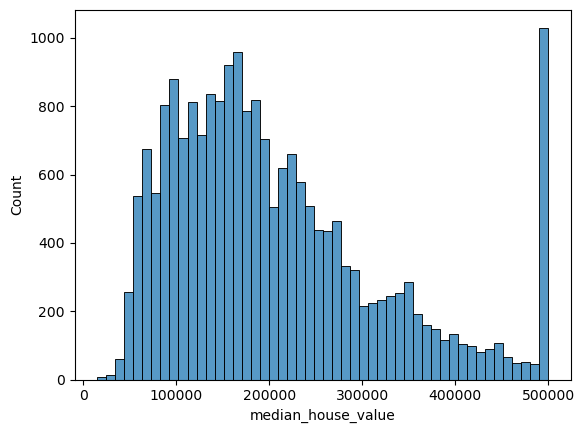

In [5]:
sns.histplot(df['median_house_value'], bins=50)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

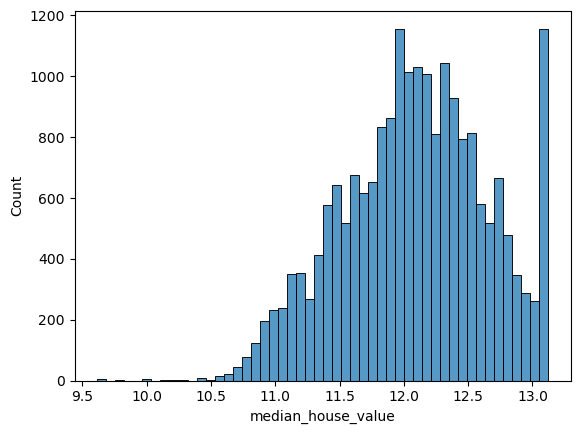

In [6]:
sns.histplot(np.log(df['median_house_value']), bins=50)

Dataset doesn't ahve such a long tail 

In [7]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
list_features = list(df.columns)
list_features.remove('ocean_proximity')

## Features

In [9]:
df_filter = df[list_features]
df_filter.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [21]:
df_filter.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


***

# Question 1
Find a feature with missing values. How many missing values does it have?

In [10]:
df_filter.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2

What's the median (50% percentile) for variable 'population'?

In [11]:
df_filter.population.median()

1166.0

## Split the data 

In [12]:
n = len(df_filter)


n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

print(n_train, n_val, n_test)

12384 4128 4128


In [13]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [14]:
# Shuffle dataset 
df_train = df_filter.iloc[idx[:n_train]]
df_val   = df_filter.iloc[idx[n_train: n_train+n_val]]
df_test  = df_filter.iloc[idx[n_train+n_val:]]

print(df_train.shape, df_val.shape, df_test.shape)

(12384, 9) (4128, 9) (4128, 9)


In [15]:
# Y values 
y_train = np.log1p(df_train.median_house_value)
y_val   = np.log1p(df_val.median_house_value)
y_test  = np.log1p(df_test.median_house_value)

# Question 3

We need to deal with missing values for the column from Q1.We have two options: fill it with 0 or with the mean of this variable.

Try both options. For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option. Round the RMSE scores to 2 decimal digits using round(score, 2). 


Which option gives better RMSE?

In [16]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [23]:
# mean bedrooms - from train dataset
mean_bedrooms_train = int(df_train.total_bedrooms.mean())
mean_bedrooms_train

533

In [24]:
def prepare_X_housing(df, missing=0):
    df = df.copy()
    
    if (missing == 0):
        df = df.fillna(0.0)
        
    else:
        df = df.fillna(mean_bedrooms_train)
        
    X = df.values
    
    return X

def rsme(y, y_pred):
    sqerror = (y - y_pred)**2
    mse = sqerror.mean()
    return np.sqrt(mse)

In [25]:
# Prepare X-data
X_train = prepare_X_housing(df_train, 0)

# Train model
w0, w = train_linear_regression(X_train, y_train)

# Get Prediction on validation dataset
X_val = prepare_X_housing(df_val, 0)
y_pred = w0 + X_val.dot(w)

# Compute Metrics
round(rsme(y_pred, y_val),2), rsme(y_pred, y_val)

(0.17, 0.16556284883278452)

In [26]:
# Model training using Train Dataset
X_train = prepare_X_housing(df_train, 1)
w0, w = train_linear_regression(X_train, y_train)

# Get Prediction on validation dataset
X_val = prepare_X_housing(df_val, 1)
y_pred = w0 + X_val.dot(w)

# Compute Metrics
round(rsme(y_pred, y_val),2), rsme(y_pred, y_val)

(0.17, 0.1655625276788831)

# Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [27]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [28]:
# Prepare X-data
X_train = prepare_X_housing(df_train, 0)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:

    # Train model
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    # Get Prediction on validation dataset
    X_val = prepare_X_housing(df_val, 0)
    y_pred = w0 + X_val.dot(w)

    # Compute Metrics
    print(r, round(rsme(y_pred, y_val),2), rsme(y_pred, y_val))

0 0.17 0.16556284883278452
1e-06 0.17 0.16556284652891423
0.0001 0.17 0.16556261851427126
0.001 0.17 0.1655605545833235
0.01 0.17 0.16554077736603104
0.1 0.17 0.16541090440914363
1 0.17 0.16561117536363196
5 0.17 0.16623547947704684
10 0.17 0.16639662261780888


# Question 5

    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))


In [30]:
def split_data(df, seed):
    n = len(df_filter)

    # 60/20/20 distribution
    n_val = int(n*0.2)
    n_test = int(n*0.2)
    n_train = n - n_val - n_test

    # Shuffle
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    # Shuffle dataset 
    df_train = df_filter.iloc[idx[:n_train]]
    df_val   = df_filter.iloc[idx[n_train: n_train+n_val]]
    df_test  = df_filter.iloc[idx[n_train+n_val:]]
    
    # Y -vals
    y_train = np.log1p(df_train.median_house_value)
    y_val   = np.log1p(df_val.median_house_value)
    y_test  = np.log1p(df_test.median_house_value)
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [31]:
list_rsme = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # split data with seed specified
    df_train, df_val, df_test, y_train, y_val, y_test = split_data(df_filter, seed)

    # Model training using Train Dataset
    X_train = prepare_X_housing(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)

    # Get Prediction on validation dataset
    X_val = prepare_X_housing(df_val, 0)
    y_pred = w0 + X_val.dot(w)

    # Compute Metrics
    score = rsme(y_pred, y_val)
    list_rsme.append(score)
    print(seed, score, rsme(y_pred, y_val))
    
# compute std of rsmes
print(round(np.std(list_rsme), 3))

0 0.1665516518109162 0.1665516518109162
1 0.16285261668132003 0.16285261668132003
2 0.16411721641030952 0.16411721641030952
3 0.16776250482743818 0.16776250482743818
4 0.16626399956509078 0.16626399956509078
5 0.16741582638550725 0.16741582638550725
6 0.162623806210108 0.162623806210108
7 0.1635213285356746 0.1635213285356746
8 0.1673623968984 0.1673623968984
9 0.1652753829003105 0.1652753829003105
0.002


# Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?


In [32]:
seed = 9 

# split data with seed specified
df_train, df_val, df_test, y_train, y_val, y_test = split_data(df_filter, seed)

In [33]:
# Combine train & val
df_train_full = pd.concat([df_train, df_val])
y_train_full  = np.concatenate([y_train, y_val])

In [34]:
# Model training using Train Dataset
X_train_full = prepare_X_housing(df_train_full, 0)
w0, w = train_linear_regression_reg(X_train_full, y_train_full, r=0.001)

# Get Prediction on validation dataset
X_test = prepare_X_housing(df_test, 0)
y_pred = w0 + X_test.dot(w)

# Compute Metrics
score = rsme(y_pred, y_test)
print(seed, score)

9 0.1695259697374546
